# Main branches regulator detection

In [1]:
import matplotlib.pyplot as plt
import scanpy as sc

In [2]:
import phlower
phlower.__version__

'0.1.3'

In [3]:
!mkdir save
!wget --no-check-certificate --no-verbose  https://costalab.ukaachen.de/open_data/PHLOWER/multiome_phlower.pickle -O save/multiome_phlower.pickle
!wget --no-check-certificate --no-verbose  https://costalab.ukaachen.de/open_data/PHLOWER/multiome_chromvar.h5 -O save/multiome_chromvar.h5

mkdir: cannot create directory ‘save’: File exists
2024-10-16 15:57:35 URL:https://costalab.ukaachen.de/open_data/PHLOWER/multiome_phlower.pickle [4365968492/4365968492] -> "save/multiome_phlower.pickle" [1]
2024-10-16 15:57:36 URL:https://costalab.ukaachen.de/open_data/PHLOWER/multiome_chromvar.h5 [73101100/73101100] -> "save/multiome_chromvar.h5" [1]


In [4]:
import pickle as pkl 
adata = pkl.load(open("save/multiome_phlower.pickle", 'rb'))


tfbdata = sc.read_10x_h5("save/multiome_chromvar.h5")
tfbdata.var_names = [i.upper() for i in tfbdata.var_names]

assert(all(tfbdata.obs_names == adata.obs_names))

import copy
tfbdata.obs = copy.deepcopy(adata.obs)
tfbdata.obsm = copy.deepcopy(adata.obsm)
tfbdata.uns = copy.deepcopy(adata.uns)


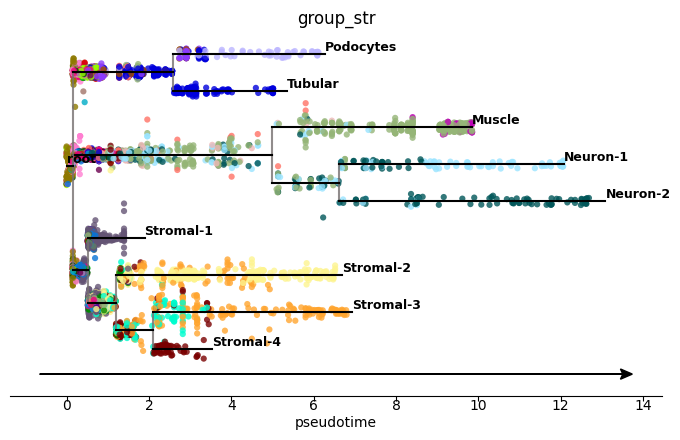

In [5]:
branch_order_preference={"original": ["Podocytes", "Muscle", "Neuron-1", "Stromal-1", "Stromal-2", "Stromal-3"]}
phlower.ext.plot_stream_sc(adata, color=['group_str'], show_legend=False, s=20,  dist_scale=.4, preference=branch_order_preference)

## List main branches

In [6]:
main_stromal = ("Stromal-1", "Stromal-2", "Stromal-3", "Stromal-4")
main_pt_podo = ("Podocytes", "Tubular")
main_neuronMuscle = ("Muscle", "Neuron-1", "Neuron-2")

## Stromal main branch regulators

In [7]:
phlower.tl.mbranch_regulator_detect(adata, tfbdata, branch=main_stromal, log2fc=0.3, correlation=0.7, name="stromal")

against branches [('Muscle', 'Neuron-2', 'Neuron-1'), ('Podocytes', 'Tubular')]
vs_name:  markers_stromalvs


/home/sz753404/miniconda3/envs/R422/lib/python3.10/site-packages/phlower/tools/tree_feature_markers.py:1134: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr = pearsonr(expression, TF)[0]


#### TF markers volcano

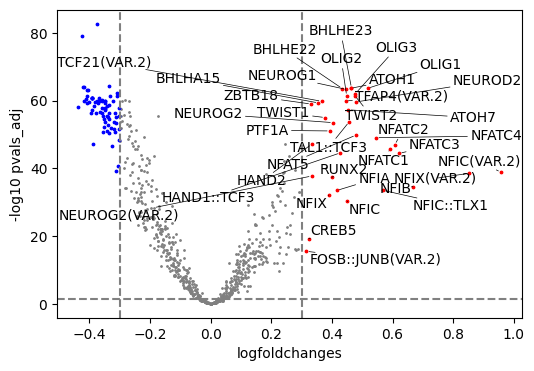

In [8]:
df = phlower.tl.get_markers_df(tfbdata, 'markers_stromalvs')
fig, ax = plt.subplots(1,1, figsize=(6, 4))
phlower.pl.volcano(df, log2fc_column='logfoldchanges', pval_column='pvals_adj',log2fc_threshold=[-.3, .3],  pval_threshold=0.05, is_adjust_text=True, text_size=10, text_up_down='up', ax=ax, show_legend=False)

#### TF gene correlations

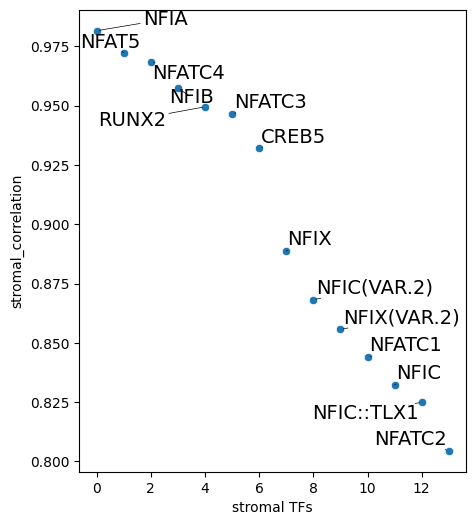

In [9]:
_, ax = plt.subplots(1,1,figsize=(5,6)) 
phlower.pl.regulator_dot_correlation(tfbdata, 'stromal', ax=ax)

#### Heatmap along main trajectory

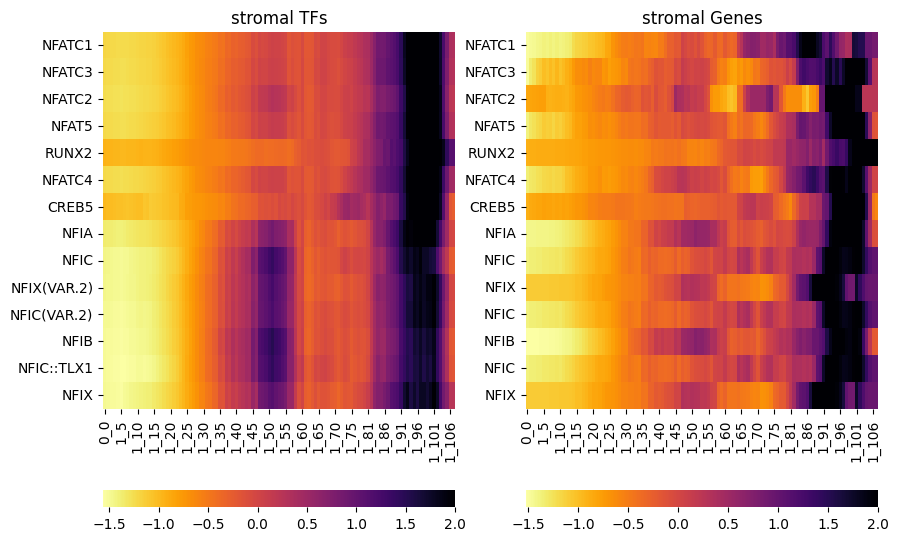

In [10]:
_,axes = phlower.pl.regulator_heatmap(adata, tfbdata, 'stromal', figsize=(10, 7))

## Podocytes & Tubular main branch regulators

In [11]:
phlower.tl.mbranch_regulator_detect(adata, tfbdata, branch=main_pt_podo, log2fc=0.5, correlation=0.7, name="epi")

against branches [('Stromal-2', 'Stromal-4', 'Stromal-1', 'Stromal-3'), ('Muscle', 'Neuron-2', 'Neuron-1')]
vs_name:  markers_epivs


/home/sz753404/miniconda3/envs/R422/lib/python3.10/site-packages/phlower/tools/tree_feature_markers.py:1134: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr = pearsonr(expression, TF)[0]


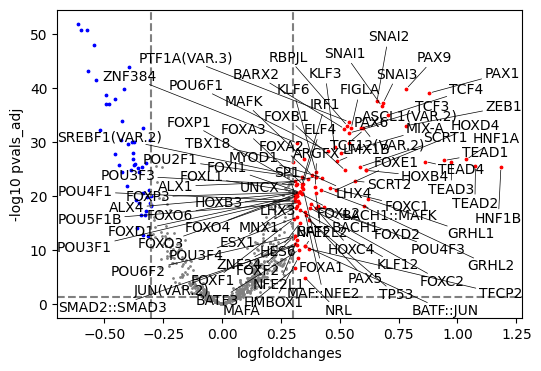

In [12]:
df = phlower.tl.get_markers_df(tfbdata, 'markers_epivs')
fig, ax = plt.subplots(1,1, figsize=(6, 4))
phlower.pl.volcano(df, log2fc_column='logfoldchanges', pval_column='pvals_adj',log2fc_threshold=[-.3, .3],  pval_threshold=0.05, is_adjust_text=True, text_size=10, text_up_down='up', ax=ax, show_legend=False)

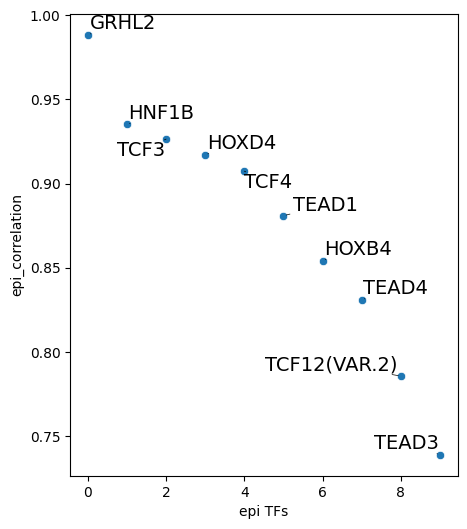

In [13]:
_, ax = plt.subplots(1,1,figsize=(5,6)) 
phlower.pl.regulator_dot_correlation(tfbdata, 'epi', ax=ax)

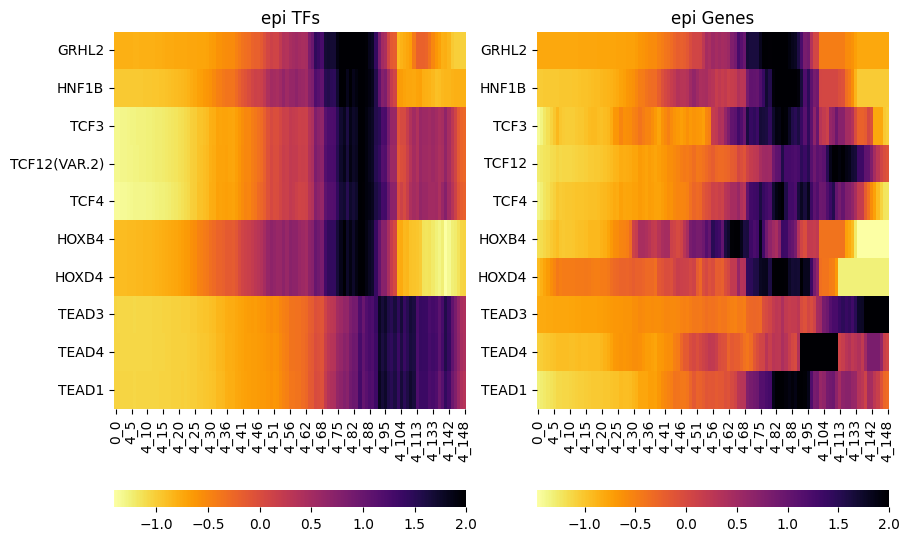

In [14]:
_,axes = phlower.pl.regulator_heatmap(adata, tfbdata, 'epi', figsize=(10, 7))

## Neuron & Muscle main branch regulators

In [15]:
phlower.tl.mbranch_regulator_detect(adata, tfbdata, branch=main_neuronMuscle, log2fc=0.2, correlation=0.7, name="neuMsl")

against branches [('Stromal-2', 'Stromal-4', 'Stromal-1', 'Stromal-3'), ('Podocytes', 'Tubular')]
vs_name:  markers_neuMslvs


/home/sz753404/miniconda3/envs/R422/lib/python3.10/site-packages/phlower/tools/tree_feature_markers.py:1134: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr = pearsonr(expression, TF)[0]


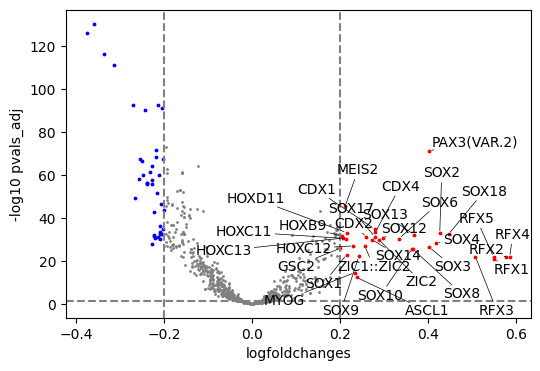

In [16]:
df = phlower.tl.get_markers_df(tfbdata, 'markers_neuMslvs')
fig, ax = plt.subplots(1,1, figsize=(6, 4))
phlower.pl.volcano(df, log2fc_column='logfoldchanges', pval_column='pvals_adj',log2fc_threshold=[-.2, .2],  pval_threshold=0.05, is_adjust_text=True, text_size=10, text_up_down='up', ax=ax, show_legend=False)

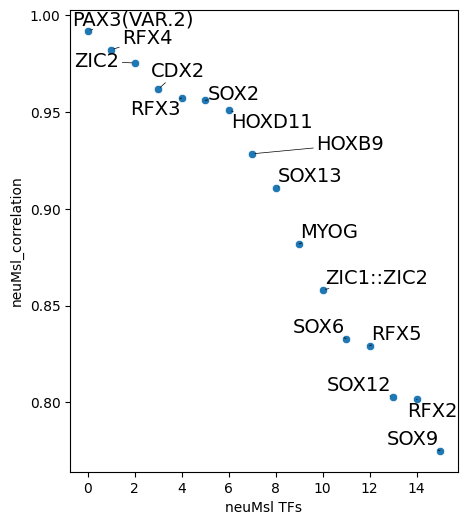

In [17]:
_, ax = plt.subplots(1,1,figsize=(5,6)) 
phlower.pl.regulator_dot_correlation(tfbdata, 'neuMsl', ax=ax)

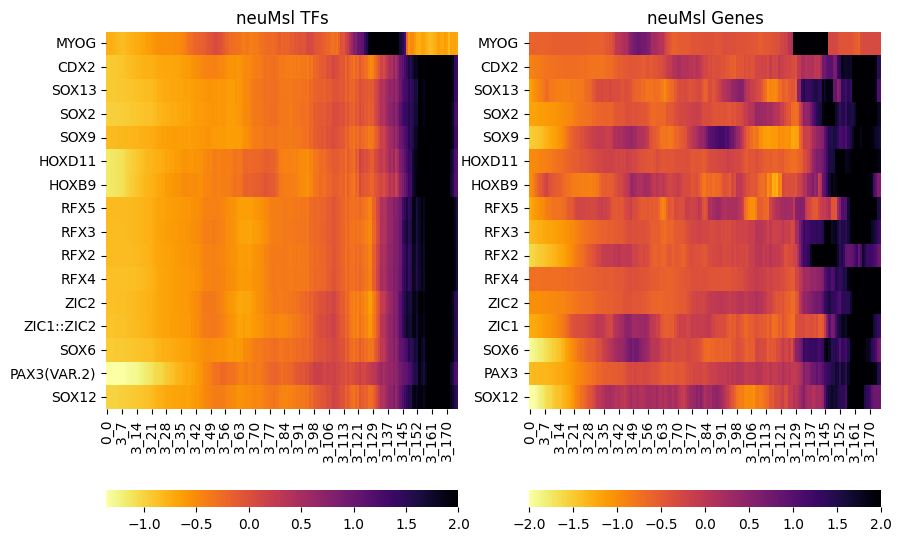

In [18]:
_,axes = phlower.pl.regulator_heatmap(adata, tfbdata, 'neuMsl', figsize=(10, 7))

In [19]:
import session_info
session_info.show()